# Import Turi Create

In [1]:
import turicreate

# Read house sales data

In [6]:
import os
os.listdir('../home_data.sframe/home_data.sframe')

['dir_archive.ini',
 'm_1ce96d9d245ca490.0000',
 'm_1ce96d9d245ca490.frame_idx',
 'm_1ce96d9d245ca490.sidx',
 'objects.bin']

In [13]:
sales = turicreate.SFrame('../home_data.sframe/home_data.sframe')

In [14]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Explore the data

In [18]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

# Average price for houses in highest zip code region

In [86]:
import turicreate.aggregate as agg

price_byzipcode = sales.groupby(key_column_names='zipcode',
           operations={'meanprice': agg.MEAN('price')})
price_byzipcode.sort('meanprice', ascending=False)

zipcode,meanprice
98039,2160606.6
98004,1355927.0977917975
98040,1194230.0035460994
98112,1095499.3680297395
98102,901258.2380952381
98109,879623.6238532111
98105,862825.2314410481
98006,859684.7630522087
98119,849448.0108695652
98005,810164.880952381


# Filtering data by sqft

In [51]:
rangesales = sales[(sales['sqft_living']>2000) & (sales['sqft_living'] <= 4000)] 
## must use &(bitwise) can be used in vector

In [54]:
rangesales.num_rows()/sales.num_rows()

0.42187572294452413

# Linear regression model that predicts price from square feet
# Split data into train data and test data

In [56]:
training_set, test_set = sales.random_split(.8,seed=0)

## Train simple regression model

In [57]:
my_features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [66]:
sqft_model = turicreate.linear_regression.create(training_set, target='price',
                                                 features=['sqft_living'], validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.003687     | 4349521.926170     | 262943.613754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [59]:
feature_model= turicreate.linear_regression.create(training_set, target='price',
                                                   features=my_features, validation_set=None)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.037722     | 4078031.198673     | 2781051.955266       | 188361.728341                   | 205577.463145                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [67]:
advanced_model = turicreate.linear_regression.create(training_set, target='price', 
                                                     features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.037019     | 4336058.938754     | 162392.982703                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the quality of different models

In [60]:
print (test_set['price'].mean())

543054.0425632532


In [68]:
print(sqft_model.evaluate(test_set))
print(feature_model.evaluate(test_set))
print(advanced_model.evaluate(test_set))

{'max_error': 4143550.882528602, 'rmse': 255191.02870527367}
{'max_error': 3206799.721998702, 'rmse': 180786.7254527822}
{'max_error': 3170363.1813858226, 'rmse': 155269.6579282571}


# Plot the model of one regressor

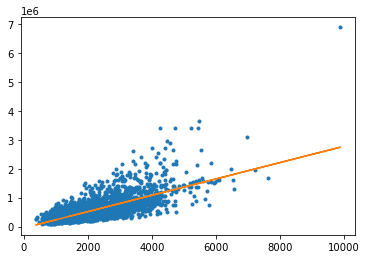

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Make prediction

In [93]:
print(advanced_model.predict(rangesales))

[619373.2276783879, 835555.6833092207, 871178.4979243916, 1381060.9154210542, 288635.24572557583, 458268.1597460266, 895753.4985334277, 644217.6742439936, 563349.4003387522, 642119.4943643655, 281028.00984687684, 760505.3064766345, 811132.4084762121, 532685.473444324, 646147.5168437562, 857971.4716386474, 674352.4952283655, 700707.5295485626, 1411798.6048910134, 584194.362185448, 923500.6751852324, 1005071.3683019527, 290481.1155901975, 425489.7204544516, 1070359.3506509005, 627115.8454317492, 545342.319951708, 771645.450020005, 1368030.2714325543, 286321.0931558437, 1261001.3179964041, 681697.7913451819, 406336.88959565805, 882237.791721629, 800316.7664995599, 430720.4838801292, 448511.96235033404, 914822.4110403634, 397957.95875382796, 597053.3098882842, 1113321.9252282656, 1075331.5781448036, 670997.7263352913, 1038113.4954451672, 532252.3601456606, 1377694.8136147466, 448093.9098747205, 805687.9394282578, 492156.00158628915, 540651.1730445274, 490382.4309399021, 727484.5426562396, 